<a href="https://colab.research.google.com/github/Chandanapentakota/Board-Game-Review-Prediction/blob/main/Board_Game_Review_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset=pd.read_csv('games.csv')

In [8]:
dataset.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [9]:
dataset.tail()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81311,184451,boardgame,Bingo Animal Kids,2010.0,1.0,6.0,10.0,10.0,10.0,2.0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [10]:
dataset.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [11]:
dataset.dropna(inplace=True)

In [12]:
dataset.shape

(81268, 20)

(array([24374.,   606.,  1324.,  3303.,  6681., 12264., 15835., 11733.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

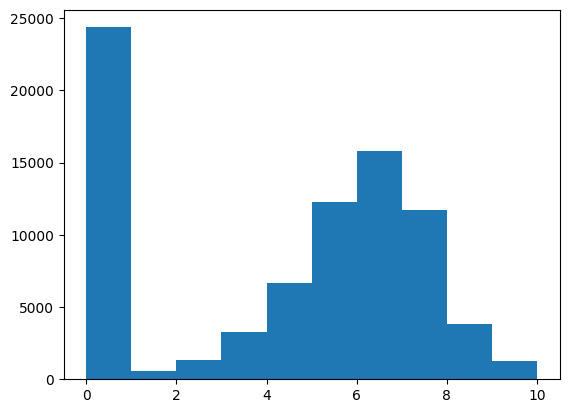

In [13]:
plt.hist(dataset['average_rating'])

In [14]:
dataset.drop('name', axis=1, inplace=True)

In [15]:
dataset.drop('type', axis=1, inplace=True)

In [16]:
dataset

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81308,184442,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81309,184443,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81310,184449,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


In [17]:
dataset.dtypes

id                        int64
yearpublished           float64
minplayers              float64
maxplayers              float64
playingtime             float64
minplaytime             float64
maxplaytime             float64
minage                  float64
users_rated               int64
average_rating          float64
bayes_average_rating    float64
total_owners              int64
total_traders             int64
total_wanters             int64
total_wishers             int64
total_comments            int64
total_weights             int64
average_weight          float64
dtype: object

In [18]:
dataset.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000,81268.000000
mean,72255.790803,1806.628735,1.991854,5.637127,51.641027,49.281882,51.641027,6.982773,161.970554,4.211753,1.158191,262.639415,9.241350,12.695575,42.741596,49.315733,16.496592,0.908288
std,58819.480391,588.514370,0.931010,56.090925,345.786095,334.567235,345.786095,5.035481,1146.282608,3.056909,2.340465,1504.932396,39.767604,60.779974,239.355450,284.937808,116.011088,1.176058
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21327.750000,1984.000000,2.000000,2.000000,7.000000,10.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43236.500000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265010,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128824.250000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.719220,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916975
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


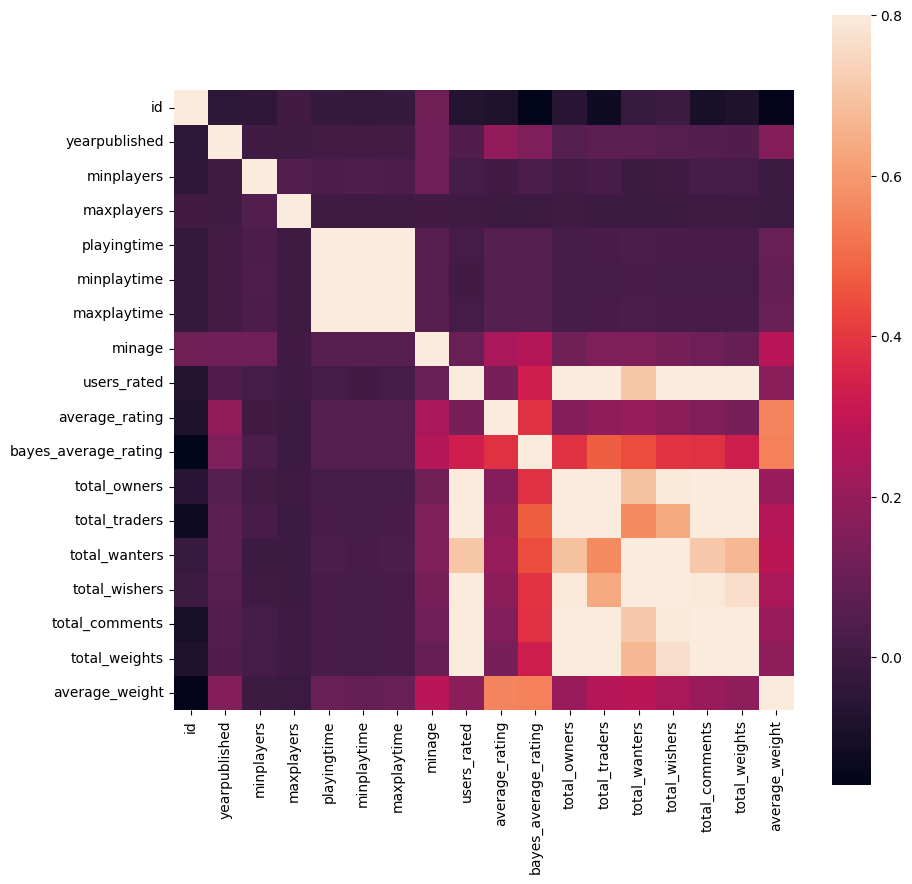

In [19]:
correlation=dataset.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=0.8,square=True)
plt.show()

In [20]:
X = dataset.iloc[: , [4,5,6,7,8,9,10]].values
y = dataset.iloc[: , 11].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train.shape

(65014, 7)

In [23]:
from math import sqrt
sqrt(65014)

254.97843046030383

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=255,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=255, random_state=0)

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
y_pred

array([1.61007408e+00, 1.29674510e+01, 1.74665538e+00, ...,
       9.68128721e-01, 1.19226667e+03, 8.68000000e+01])

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9823520438393559

In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
accuracies = cross_val_score(estimator = regressor ,X= X_train,y=y_train,cv=10)

In [31]:
accuracies.std()

0.006815924766490478

In [32]:
accuracies.mean()

0.9758222544006394